In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

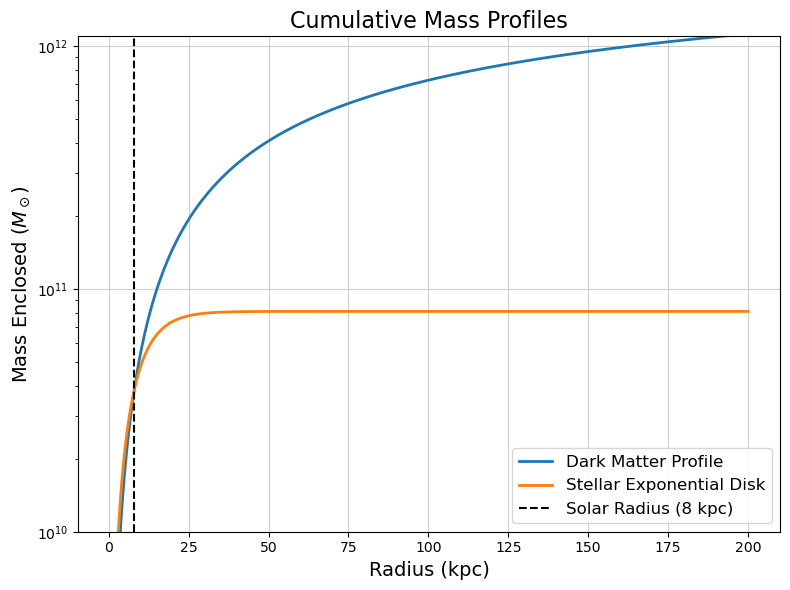

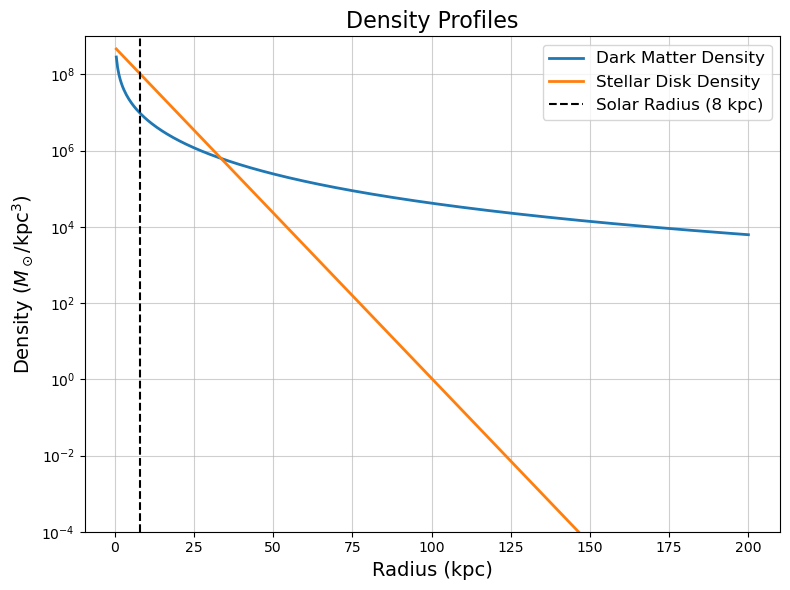

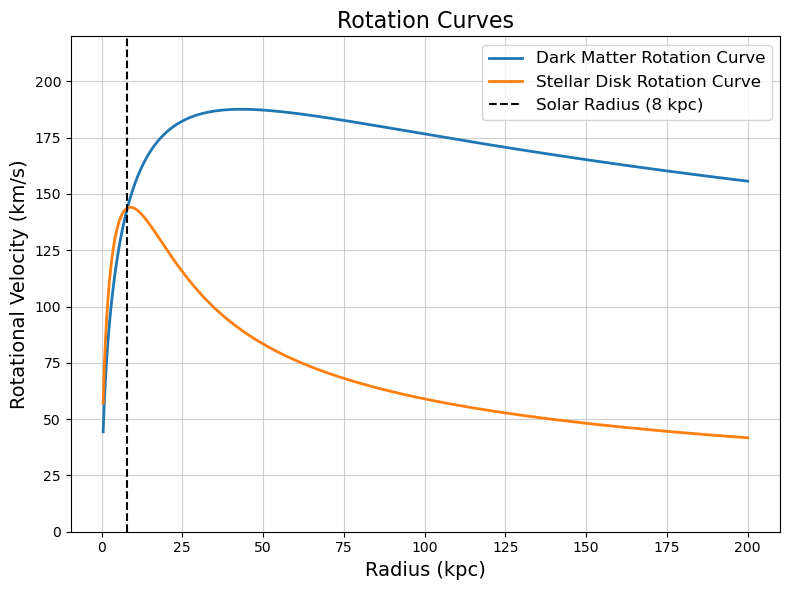

In [37]:
def nfw_density(r, rho_s, r_s):
    """Density for the NFW profile.
    Parameters:
        r (float or array): Radius (kpc).
        rho_s (float): Characteristic density of the NFW profile (M_sun/kpc^3).
        r_s (float): Scale radius of the NFW profile (kpc).
    Returns:
        float or array: Density at radius r (M_sun/kpc^3).
    """
    return rho_s / ((r / r_s) * (1 + r / r_s)**2)

def exponential_disk_density(r, Sigma_0, r_d):
    """Surface density for an exponential disk.
    Parameters:
        r (float or array): Radius (kpc).
        Sigma_0 (float): Central surface density of the disk (M_sun/kpc^2).
        r_d (float): Scale length of the disk (kpc).
    Returns:
        float or array: Surface density at radius r (M_sun/kpc^2).
    """
    return Sigma_0 * np.exp(-r / r_d)

def nfw_cumulative_mass(r, rho_s, r_s):
    """Cumulative mass for the NFW profile computed numerically.
    Parameters:
        r (float): Radius at which to calculate the mass (kpc).
        rho_s (float): Characteristic density of the NFW profile (M_sun/kpc^3).
        r_s (float): Scale radius of the NFW profile (kpc).
    Returns:
        float: Cumulative mass at radius r (M_sun).
    """
    mass, _ = quad(lambda x: 4 * np.pi * x**2 * nfw_density(x, rho_s, r_s), 0, r)
    return mass

def exponential_disk_cumulative_mass(r, Sigma_0, r_d):
    """Cumulative mass for an exponential disk computed numerically.
    Parameters:
        r (float): Radius at which to calculate the mass (kpc).
        Sigma_0 (float): Central surface density of the disk (M_sun/kpc^2).
        r_d (float): Scale length of the disk (kpc).
    Returns:
        float: Cumulative mass at radius r (M_sun).
    """
    mass, _ = quad(lambda x: 2 * np.pi * x * exponential_disk_density(x, Sigma_0, r_d), 0, r)
    return mass

# Define NFW profile parameters based on M_vir and r_s
M_vir = 1e12  # Virial mass in M_sun
r_s = 20      # Scale radius in kpc

# Compute r_vir from M_vir and r_s
G = 4.30091e-6  # Gravitational constant in kpc (km/s)^2 / M_sun
rho_crit = 277.72  # Critical density of the Universe in M_sun/kpc^3
c = (M_vir / (200 * (4 / 3) * np.pi * rho_crit))**(1 / 3) / r_s  # Concentration parameter
r_vir = c * r_s

# Compute rho_s directly from M_vir and r_s
rho_s = M_vir / (4 * np.pi * r_s**3 * (np.log(1 + c) - c / (1 + c)))

# Define Solar radius and compute NFW mass enclosed at Solar radius
solar_radius = 8  # kpc
mass_nfw_solar = nfw_cumulative_mass(solar_radius, rho_s, r_s)

# Set up the exponential disk to have the same mass at the Solar radius
r_d = 5  # Scale length in kpc
Sigma_0 = mass_nfw_solar / (2 * np.pi * r_d**2 * (1 - np.exp(-solar_radius / r_d) * (1 + solar_radius / r_d)))

# Radii over which to compute the profiles
r = np.linspace(0.5, 200, 500)  # Avoid r=0 to prevent division by zero

# Compute cumulative mass profiles numerically
mass_nfw = np.array([nfw_cumulative_mass(ri, rho_s, r_s) for ri in r])
mass_disk = np.array([exponential_disk_cumulative_mass(ri, Sigma_0, r_d) for ri in r])

# Compute density profiles
density_nfw = nfw_density(r, rho_s, r_s)
density_disk = exponential_disk_density(r, Sigma_0, r_d)

# Compute rotation curves
vc_nfw = np.sqrt(G * mass_nfw / r)  # NFW rotational velocity
vc_disk = np.sqrt(G * mass_disk / r)  # Disk rotational velocity

# Plot the cumulative mass results
plt.figure(figsize=(8, 6))
plt.plot(r, mass_nfw, label='Dark Matter Profile', lw=2)
plt.plot(r, mass_disk, label='Stellar Exponential Disk', lw=2)
plt.axvline(solar_radius, color='k', linestyle='--', label=f'Solar Radius ({solar_radius} kpc)')
plt.xlabel('Radius (kpc)', fontsize=14)
plt.ylabel('Mass Enclosed ($M_\odot$)', fontsize=14)
plt.yscale('log')
plt.ylim(1e+10,1.1e+12)
plt.title('Cumulative Mass Profiles', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.savefig('plots/nfw_expdisk_mass_enclosed.png', bbox_inches='tight', facecolor='white')
plt.show()

# Plot the density profiles
plt.figure(figsize=(8, 6))
plt.plot(r, density_nfw, label='Dark Matter Density', lw=2)
plt.plot(r, density_disk, label='Stellar Disk Density', lw=2)
plt.axvline(solar_radius, color='k', linestyle='--', label=f'Solar Radius ({solar_radius} kpc)')
plt.xlabel('Radius (kpc)', fontsize=14)
plt.ylabel('Density ($M_\odot$/kpc$^3$)', fontsize=14)
plt.yscale('log')
plt.ylim(1e-4,1e+9)
plt.title('Density Profiles', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.savefig('plots/nfw_expdisk_density.png', bbox_inches='tight', facecolor='white')
plt.show()

# Plot the rotation curves
plt.figure(figsize=(8, 6))
plt.plot(r, vc_nfw, label='Dark Matter Rotation Curve', lw=2)
plt.plot(r, vc_disk, label='Stellar Disk Rotation Curve', lw=2)
plt.axvline(solar_radius, color='k', linestyle='--', label=f'Solar Radius ({solar_radius} kpc)')
plt.xlabel('Radius (kpc)', fontsize=14)
plt.ylabel('Rotational Velocity (km/s)', fontsize=14)
plt.ylim(0,220)
plt.title('Rotation Curves', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.savefig('plots/nfw_expdisk_vcirc.png', bbox_inches='tight', facecolor='white')
plt.show()

In [32]:
r_vir

162.5890946673578